In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline
pd.set_option("display.max_columns", None)

In [7]:
data = pd.read_csv("energydata.csv")

data.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [41]:
#fitting T2 to T6
model = LinearRegression()

X = data[["T2"]]
y = data["T6"]

model.fit(X, y)

y_pred = model.predict(X)

rsme = np.sqrt(mean_squared_error(y, y_pred))

print("RSME for Linear model fitting T2 to T6 = {}".format(round(rsme, 3)))

RSME for Linear model fitting T2 to T6 = 3.716


In [63]:
m = LinearRegression()

X = data[["T2"]]
y = data["T6"]

#X_train, X_test, y_train, y_test = train_test_split(X, y)

model.fit(X, y)

y_pred = model.predict(X)

rsme = np.sqrt(mean_squared_error(y, y_pred))

print("RSME for Linear model fitting T2 to T6 = {}".format(round(rsme, 3)))

RSME for Linear model fitting T2 to T6 = 3.644


In [42]:
#dropping date and lights
new_df = data.drop(["date", "lights"], axis=1)

#features and target
X = new_df.drop("Appliances", axis=1)
y = new_df.Appliances

#splitting into training and testing sets with seed = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

#scaler object
scaler = MinMaxScaler()

#scaling training and testing features
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

#instantiating linear model
lm = LinearRegression()

#fitting the model
lm.fit(scaled_X_train, y_train)

#prediction
y_hat = lm.predict(scaled_X_test)

#MAE
mae = mean_absolute_error(y_test, y_hat)
print("MAE for testing set = {}".format(round(mae, 3)))

#RSME
rmse = np.sqrt(mean_squared_error(y_test, y_hat))
print("RSME for testing set = {}".format(round(rmse, 3)))

MAE for testing set = 53.641
RSME for testing set = 93.637


In [44]:
#training set
training_predictions = lm.predict(scaled_X_train)

#MAE training set
mae_training = mean_absolute_error(y_train, training_predictions)
print("MAE for training set = {}".format(round(mae_training, 3)))

#RSME training set
rsme_training = np.sqrt(mean_squared_error(y_train, training_predictions))
print("RSME for training set = {}".format(round(rsme_training, 3)))

MAE for training set = 53.742
RSME for training set = 95.216


In [45]:
#ridge
ridge = Ridge()

ridge.fit(scaled_X_train, y_train)

ridge_predictions = ridge.predict(scaled_X_test)

ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_predictions))
print("RSME for Ridge model = {}".format(round(ridge_rmse, 3)))

RSME for Ridge model = 93.709


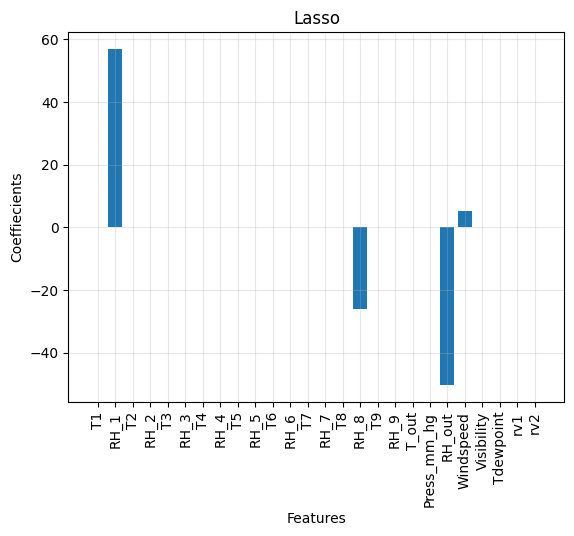

Features which have non-zero coeffiecients in the Lasso model are 4


In [61]:
#Lasso
lasso = Lasso()

lasso.fit(scaled_X_train, y_train)

lasso_coefs = l.coef_

plt.bar(np.arange(len(lasso_coefs)), lasso_coefs)
plt.xticks(np.arange(len(lasso_coefs)), labels=X.columns.tolist(), rotation=90)
plt.xlabel("Features")
plt.ylabel("Coeffiecients")
plt.title("Lasso")
plt.grid(alpha=.3)
plt.show()

print("Features which have non-zero coeffiecients in the Lasso model are {}".format(4))

In [62]:
lasso_predictions = lasso.predict(scaled_X_test)
lasso_RSME = np.sqrt(mean_squared_error(y_test, lasso_predictions))
print("RSME for testing set on a Lasso model = {}".format(round(lasso_RSME, 3)))

RSME for testing set on a Lasso model = 99.424
